## 0. Введение и условия

К нам обратился фермер, владелец молочного хозяйства «Вольный луг». 
Он хочет <b>купить бурёнок</b>, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая <b>бурёнка давала не менее 6000 килограммов молока в год</b>, а её надой был вкусным — строго по <b>его критериям, ничуть не хуже</b>. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему <b>управлять рисками </b> и принимать <b>объективное решение</b> о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам <b> нужно создать две прогнозные модели для отбора </b>бурёнок в поголовье.

Модели МО:
* Первая будет прогнозировать возможный <b> удой </b> коровы;
* Вторая — рассчитывать вероятность получить <b> вкусное молоко </b> от коровы.


С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;

молоко должно быть вкусным.

Описание данных

Файл <b>ferma_main.csv </b>содержит данные о стаде фермера на текущий момент. Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).


Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


Признаки в датасете<b> ferma_main.csv можно разделить на группы </b>.

Характеристики коровы: id, Порода, порода папы_быка, Возраст.

Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое 
соотношение).

Характеристика пастбища: Тип пастбища.

Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл <b>ferma_dad.csv</b> хранит имя папы каждой коровы в стаде фермера. Описание данных:

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

Файл <b>cow_buy.csv </b>— это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

---

Пока что могу сказать - тема МО пока что кажется очень сложной, но если я правильно усвоил то, чему нас обучили - первая модель будет линейной регрессий (нужная конкретная цифра, не дискретная вел.), вторая будет бинарной классификацией (вкусное/ не вкусное).

**Краткий план работ по анализу данных о поголовье коров**

1. **Загрузка данных**  
   - Считать данные из предоставленных файлов (df_ferma, df_buy, df_dad).  
   - Подключить необходимые библиотеки для анализа и обработки данных.  
   - Проверить корректность загруженных данных (формат, наличие пропусков, целостность).

2. **Предобработка данных**  
   - Привести названия столбцов к единому стилю (нижний регистр, слова через "_", единицы измерения словами).  
   - Проверить данные на наличие ошибок, дубликатов и аномалий в каждом датасете:  
     - **df_ferma**: проверить id, породы, пастбища, числовые показатели (удой, ЭКЕ, СПО и др.).  
     - **df_buy**: выявить возможные дубликаты, оценить корректность характеристик.  
     - **df_dad**: проверить id и имена отцов, их уникальность.  
   - Исправить ошибки (например, опечатки в названиях, некорректные типы данных).  
   - Удалить явные дубликаты, если они есть, с учетом особенностей данных (возможные "близнецы-коровы").  
   - Создать вспомогательные функции для автоматизации предобработки.

3. **Исследовательский анализ данных**  
   - Оценить распределение числовых признаков (удой, ЭКЕ, СПО, жирность, белок) и выявить выбросы.  
   - Проанализировать категориальные признаки (порода, тип пастбища, порода отца, возраст) и их распределение.  
   - Изучить состав предлагаемых коров (df_buy) и отцов (df_dad).  
   - Сфокусироваться на целевых признаках: удой и вкус молока, их связь с другими характеристиками.  

4. **Корреляционный анализ**  
   - Оценить корреляцию между количественными признаками (удой, ЭКЕ, СПО, жирность, белок) с использованием шкалы Чеддока.  
   - Проверить взаимосвязь категориальных признаков методом Крамера.  
   - Использовать коэффициент Фи для анализа связей между категориальными и количественными признаками.  
   - Выявить ключевые факторы, влияющие на удой и вкус молока.

5. **Обучение модели линейной регрессии (для предсказания удоя)**  
   - Выбрать признаки для модели, исключив те, что вызывают мультиколлинеарность (например, возраст, жирность, если они сильно коррелируют с другими).  
   - Построить первую модель на основе ключевых признаков (ЭКЕ, СПО, порода, тип пастбища).  
   - Оценить качество модели (R², MAE, MSE, RMSE) и распределение остатков.  
   - Улучшить модель, преобразовав нелинейные зависимости (например, СПО в бинарный признак, ЭКЕ в квадрат).  
   - Добавить дополнительные признаки (например, имя отца), если они улучшают модель.  
   - Сравнить несколько версий модели и выбрать лучшую.  
   - Спрогнозировать удой для коров из df_buy, используя средние значения недостающих признаков из df_ferma с увеличением на 5%.

6. **Обучение модели логистической регрессии (для предсказания вкуса молока)**  
   - Выбрать признаки, коррелирующие с вкусом молока (например, ЭКЕ, СПО, тип пастбища, жирность).  
   - Построить модель, минимизируя ошибки первого рода (ложноположительные результаты).  
   - Оценить модель с помощью матрицы ошибок и метрик (precision, recall).  
   - Настроить пороговое значение для повышения точности предсказания вкусного молока.  
   - Спрогнозировать вкус молока для коров из df_buy.

7. **Итоговый анализ и рекомендации**  
   - Сравнить результаты моделей, выделить наиболее точные предсказания удоя и вкуса молока.  
   - Дать рекомендации фермеру по выбору коров из df_buy на основе прогнозов.  
   - Предложить улучшения для данных (добавление новых признаков, уточнение дубликатов) и дальнейших исследований.


## 1. Загрузка данных

Подключим все библиотеки, счиатем все данные и познокомимся с данными

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade plotly
import plotly.express as px

import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import norm

!pip install phik
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [2]:
df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv',  sep=';')
df_buy = pd.read_csv('/datasets/cow_buy.csv',  sep=';')

Считали, посмотрим, все ли хорошо

In [3]:
print(df_ferma.info())
print(df_dad.info())
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
display(df_dad.head())
display(df_buy.head())
df_ferma.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


С данными первое знакомство сделали, надо их предобработать

##  2. Предобработка данных

### 2.1 Общие изменения

Начнем с названий столбцов. Единицы измерения напишем словами, все слова к нижнему регистру и через _

In [5]:
df_dad.columns = ['id', 'имя_папы']
df_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 
                  'жирность_проценты', 'белок_проценты', 'возраст']
df_ferma.columns = ['id', 'удой_кг', 'эке',
       'протеин_грамм', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_проценты', 'белок_проценты',
       'вкус_молока', 'возраст']

display(df_ferma.columns, df_dad.columns, df_buy.columns)

Index(['id', 'удой_кг', 'эке', 'протеин_грамм', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_проценты',
       'белок_проценты', 'вкус_молока', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'жирность_проценты', 'белок_проценты', 'возраст'],
      dtype='object')

---

Это я переделываю, потому что понял, что во всех df делаю одни и те же действия, а раз что-то повторяется многократно, то это можно сделать функциями. Тут будет понятно, что я уже работал с данными, поэтому где-то не делаю проверки чего-то, а сразу привожу к нормальному виду (просто странно было бы оставлять предыдущее и новое вместе).

---

In [6]:
# обработка типов данных и категорий 

def col_type(df):
    for col in df.columns:
        if col in ['жирность_проценты','белок_проценты','спо','эке']:
            df[col] = df[col].str.replace(",", ".").astype('float')
        elif col == 'возраст':
            df[col] = df[col].apply(lambda x: 1 if x == 'более_2_лет' else 0)
        elif col == 'вкус_молока':
            df[col] = df[col].apply(lambda x: 1 if x == 'вкусно' else 0)

In [7]:
# обработка внутри, если не числовые, то к нижнему регистру
def str_proc(df):
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        df[col] = df[col].str.lower()
    

In [8]:
col_type(df_buy)
col_type(df_dad)
col_type(df_ferma)
str_proc(df_buy)
str_proc(df_dad)
str_proc(df_ferma)

Дальше пойду по всем df отдельно, заодно проверим изменения. Проверю

1. правильность типов данных в столбцах
2. где возможно наличие дубликатов
3. где возможно наличие явных дубликатов

### 2.2 df_dad

In [9]:
display(df_dad.info())
display(df_dad['имя_папы'].unique())
display(df_dad['id'].unique())
display(f'Уникальных id {len(df_dad["id"].unique())}')
display(f'Дубликатов:{df_dad.duplicated().sum()}')
df_dad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

array(['буйный', 'соловчик', 'барин', 'геркулес'], dtype=object)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

'Уникальных id 629'

'Дубликатов:0'

,id,имя_папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


id - целые номера, в нормальной форме, выглядят правильно
имена - объекты, всего 4 ункиальных значения

Все нормально, идем дальше

---

### 2.3 df_buy

In [10]:
df_buy.info()
df_buy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   порода             20 non-null     object 
 1   тип_пастбища       20 non-null     object 
 2   порода_папы_быка   20 non-null     object 
 3   имя_папы           20 non-null     object 
 4   жирность_проценты  20 non-null     float64
 5   белок_проценты     20 non-null     float64
 6   возраст            20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,1
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,0


In [11]:
df_buy[df_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1
14,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1
19,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1


тут вопрос, может быть дубликаты - это дубликаты, а может просто предложанные коровы прям похожи, вплоть до процентов белка и тд. Были бы хотя бы id, могли бы их проверить

In [12]:
l = ['тип_пастбища', 'имя_папы', 'порода']

for i in l:
    print(f"\nРаспределение для столбца '{i}':")
    print(df_buy[i].value_counts())


Распределение для столбца 'тип_пастбища':
равнинное    11
холмистое     9
Name: тип_пастбища, dtype: int64

Распределение для столбца 'имя_папы':
буйный      8
геркулес    6
барин       4
соловчик    2
Name: имя_папы, dtype: int64

Распределение для столбца 'порода':
рефлешнсоверинг    11
вис бик айдиал      9
Name: порода, dtype: int64


Данные вроде бы нормальные, ошибок в записях не выявлено, явные дубликаты в данном случае не могу принять за атковые (оставляю вероятность "близнецов-коров")

---

### 2.4 df_ferm

In [13]:
display(df_ferma.info())
df_ferma.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 634 non-null    int64  
 1   удой_кг            634 non-null    int64  
 2   эке                634 non-null    float64
 3   протеин_грамм      634 non-null    int64  
 4   спо                634 non-null    float64
 5   порода             634 non-null    object 
 6   тип_пастбища       634 non-null    object 
 7   порода_папы_быка   634 non-null    object 
 8   жирность_проценты  634 non-null    float64
 9   белок_проценты     634 non-null    float64
 10  вкус_молока        634 non-null    int64  
 11  возраст            634 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.6+ KB


None

,id,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинные,соверин,3.54,3.079,1,0
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинные,соверин,3.73,3.073,1,0


Проверим категориальные, потому что там может быть фигня.

In [14]:
for col in df_ferma.select_dtypes(include=['object']).columns:
    print(df_ferma[col].value_counts())
    print('----')

вис бик айдиал     373
рефлешнсоверинг    261
Name: порода, dtype: int64
----
холмистое    356
равнинное    253
равнинные     25
Name: тип_пастбища, dtype: int64
----
соверин    316
айдиал     240
айдиалл     78
Name: порода_папы_быка, dtype: int64
----


Вот и ошибки:  Айдиалл меняем на Айдиал; Равнинные меняем на Равнинное. Так же приводим все к нижнему рег.

In [15]:
df_ferma['порода_папы_быка'] = df_ferma['порода_папы_быка'].str.replace("айдиалл", "айдиал")
df_ferma['тип_пастбища'] = df_ferma['тип_пастбища'].str.replace("равнинные", "равнинное")


for col in df_ferma.select_dtypes(include=['object']).columns:
    print(df_ferma[col].value_counts())
    print('----')

вис бик айдиал     373
рефлешнсоверинг    261
Name: порода, dtype: int64
----
холмистое    356
равнинное    278
Name: тип_пастбища, dtype: int64
----
айдиал     318
соверин    316
Name: порода_папы_быка, dtype: int64
----


In [16]:
print(df_ferma.id.duplicated().sum())
df_ferma[df_ferma.duplicated()]

5


,id,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,1
630,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,1
631,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,1
632,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,1
633,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,1


5 повторов в id, 5 повторов всего по df - значит это одна и та же корова, которую мы удалим.

In [17]:
df_ferma = df_ferma.drop_duplicates().reset_index(drop=True)
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 629 non-null    int64  
 1   удой_кг            629 non-null    int64  
 2   эке                629 non-null    float64
 3   протеин_грамм      629 non-null    int64  
 4   спо                629 non-null    float64
 5   порода             629 non-null    object 
 6   тип_пастбища       629 non-null    object 
 7   порода_папы_быка   629 non-null    object 
 8   жирность_проценты  629 non-null    float64
 9   белок_проценты     629 non-null    float64
 10  вкус_молока        629 non-null    int64  
 11  возраст            629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.1+ KB


Дубликаты убрали, типы правильные, идем дальше

<span class="birk"><b>Вывод по разделу "Предобработка данных":</b></span>

Проверили данные, привели названия столбцов к нормальному виду, удалили явные дубликаты, поменяли типы данных на правильные. Для достижениях этих целей создали функции-помощники.

## 3. Исследовательский анализ данных

Начнем с оценки имеющегося поголовья - df_ferma

### 3.1 df_ferma

In [18]:
display(df_ferma.info())
df_ferma.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 629 non-null    int64  
 1   удой_кг            629 non-null    int64  
 2   эке                629 non-null    float64
 3   протеин_грамм      629 non-null    int64  
 4   спо                629 non-null    float64
 5   порода             629 non-null    object 
 6   тип_пастбища       629 non-null    object 
 7   порода_папы_быка   629 non-null    object 
 8   жирность_проценты  629 non-null    float64
 9   белок_проценты     629 non-null    float64
 10  вкус_молока        629 non-null    int64  
 11  возраст            629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.1+ KB


None

,id,удой_кг,эке,протеин_грамм,спо,жирность_проценты,белок_проценты,вкус_молока,возраст
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671,0.589825,0.825119
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549,0.492257,0.380167
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000,0.000000,0.000000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000,0.000000,1.000000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000,1.000000,1.000000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000,1.000000,1.000000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000,1.000000,1.000000


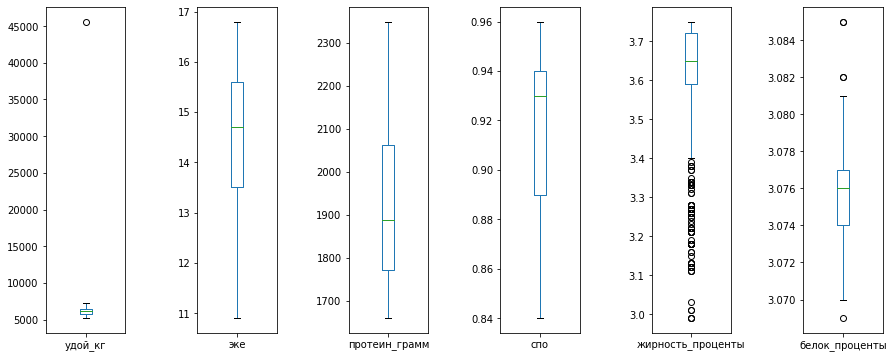

In [19]:
df_ferma[['удой_кг',
         'эке',
         'протеин_грамм',
        'спо',
        'жирность_проценты',
        'белок_проценты']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
 
plt.subplots_adjust(wspace=0.9) 
plt.show()


В "удой" явный выброс, уберем его. эке, протеин и спо окей. жирность, белок имеет отклонения, но они не очень большие (не как в случае с удоем), поэтому оставим.

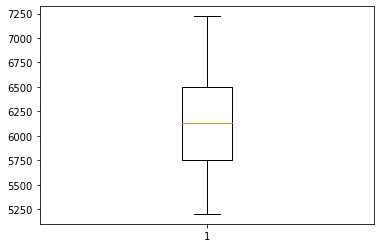

In [20]:
df_ferma = df_ferma.drop(df_ferma[df_ferma['удой_кг'] > 20000].index)
plt.boxplot(df_ferma['удой_кг'])
plt.show()

In [21]:
df_ferma.describe()

,id,удой_кг,эке,протеин_грамм,спо,жирность_проценты,белок_проценты,вкус_молока,возраст
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670,0.589172,0.824841
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551,0.492376,0.380406
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000,0.000000,0.000000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000,0.000000,1.000000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000,1.000000,1.000000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000,1.000000,1.000000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000,1.000000,1.000000


Получили среднее значение удоя - 6132 кг, эке - 14,7, протеина - 1888 грамм, спо - 0,93, жирность - 3,65% и белок - 3,08%.
Был один явный выброс в "удое" - его исключили.

Пойдем дальше, стоит посмотреть еще нечисловые переменные. Особый интерес конечно у <b>вкусность</b>, потому что это целевой признак (второй удой, его рассмотрели выше)

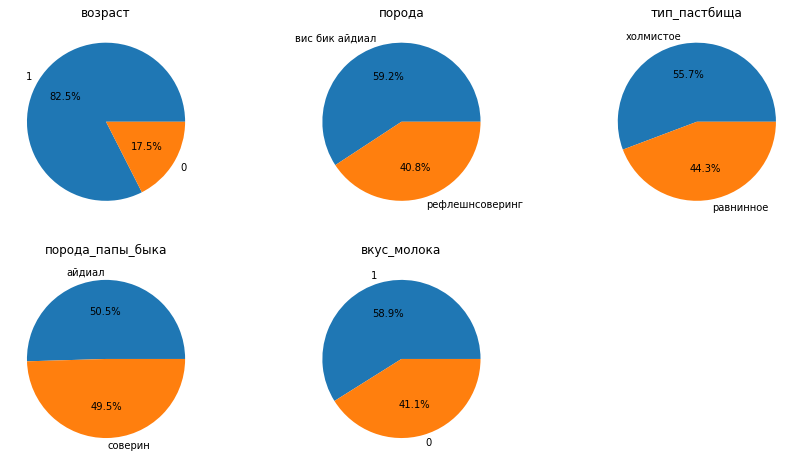

In [22]:
l = ['возраст','порода', 'тип_пастбища', 'порода_папы_быка','вкус_молока']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes = axes.flatten()

for i, column in enumerate(l[:5]): 
    counts = df_ferma[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(column)
    
axes[5].set_visible(False)
plt.subplots_adjust(wspace=0.2)
plt.show()

* В имеющихся образцах в 5 раз преобладают коровы старше 2 лет.
* В породах чуть больше лидирует Вис Бик Айдиал, сравнивая с РефлешнСоверинг
* Самое популярное пастибище по типу - холмистое (55,7%), чуть меньше равнного (44,3%)
* Порода папы быка практически пополам
* Вкусное преобладает (58,9%), но не прям уж с большим отрывом, попозже посмотрим, какие параметры большего всего влияют на этот показатель.

---

### 3.2 df_buy

In [23]:
display(df_buy.info())
df_buy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   порода             20 non-null     object 
 1   тип_пастбища       20 non-null     object 
 2   порода_папы_быка   20 non-null     object 
 3   имя_папы           20 non-null     object 
 4   жирность_проценты  20 non-null     float64
 5   белок_проценты     20 non-null     float64
 6   возраст            20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


None

,жирность_проценты,белок_проценты,возраст
count,20.000000,20.000000,20.000000
mean,3.577500,3.069500,0.750000
std,0.126818,0.010339,0.444262
min,3.340000,3.046000,0.000000
25%,3.510000,3.064000,0.750000
50%,3.590000,3.074000,1.000000
75%,3.650000,3.076000,1.000000
max,3.770000,3.081000,1.000000


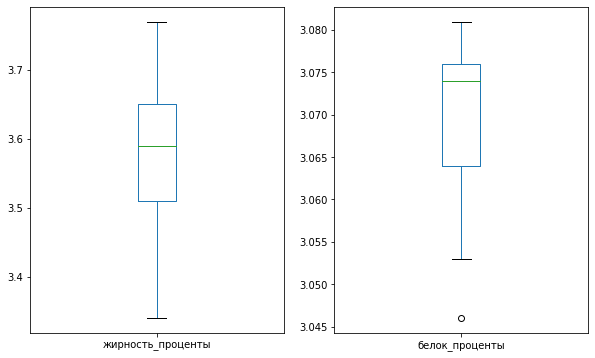

In [24]:
df_buy[['жирность_проценты','белок_проценты']].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 6))

plt.show()

Жирность прям окей, в белках есть один выброс, но в данном случае опять же, считаю, что это адекватный выброс (у удной из коров чуть меньше белка и все - не значит, что надо убрать ее).

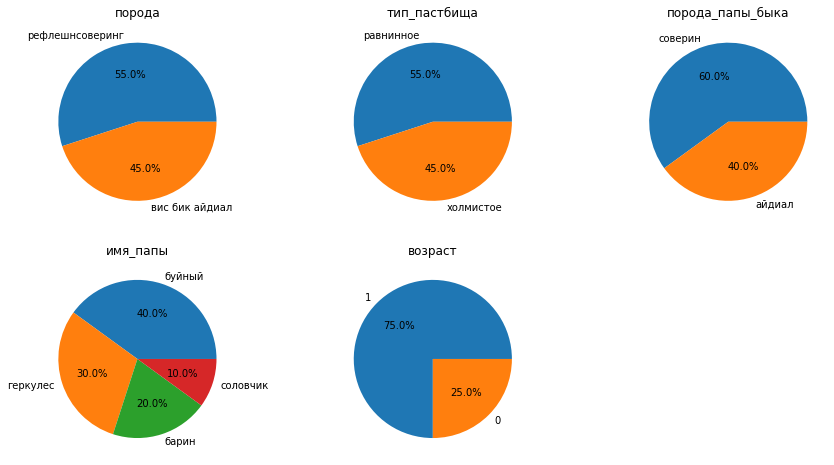

In [25]:
# Список категориальных признаков
l = ['порода', 'тип_пастбища', 'порода_папы_быка','имя_папы', 'возраст']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes = axes.flatten()

for i, column in enumerate(l[:5]): 
    counts = df_buy[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(column)
    
axes[5].set_visible(False)
plt.subplots_adjust(wspace=0.2)
plt.show()

Так, из предложанных от магазина коров получилось следующее:
* 55% РефлешнСоверинг, остальные Вис Бик Айдиал
* 55% предпочитают равнинные пастбища
* 60% произошли от Соверина
* 40% от быка Буйный, 30% Геркулеса, 20% от Барина и 10% от быка Соловчика
* Всего четверть поголовья из предложанных младше 2 лет.

---

### 3.3 df_dad

In [26]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


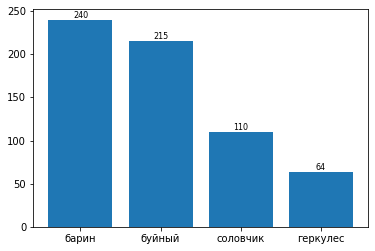

In [27]:
df = (df_dad.groupby('имя_папы')
 ['id'].count()
 .sort_values(ascending=False).reset_index())
df
bars = plt.bar(df['имя_папы'], df['id'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():d}', ha='center', va='bottom', fontsize=8)

plt.show()

 Чаще всего отцом был Барин - 240 раз. Реже всех геркулес - 64 раза. 

<span class="birk"><b>Вывод по разделу "Исследовательский анализ":</b></span>

Исследовали данные. В данных по удою нашли явный вброс - избавились от него. Изучили по категориям, что предлагают нам купить, что имеется на фарме и кратенько оценили информацию по отцам. Конечно, наиболее интресеным будет посмотреть зависимости, чем и займемся дальше.

## 4. Корреляционный анализ

### 4.1 Корреляция

В этом разделе изучим взаимосвязь между признаками в df_ferm. Особое внимание необходимо уделить целевым - удой и вкус.

In [28]:
 df_ferma.head()

,id,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0


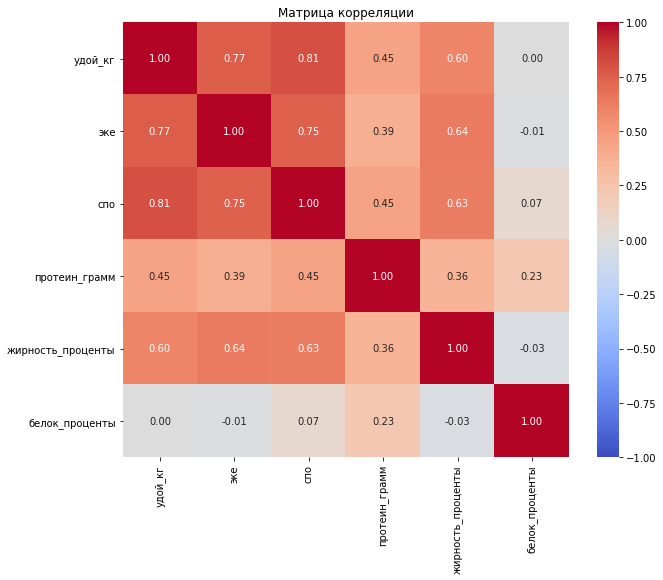

In [29]:
df = df_ferma[['удой_кг', 'эке','спо', 'протеин_грамм', 'жирность_проценты', 'белок_проценты']]

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

Картина так себе. Удой имеет высокую по шкале Чеддока зависимость от эке и спо, а также жирности (заметная по той же шкале). ЭКЕ в свою очередь имеет зависимость от жирности и спо. Видимо, из количественных признаков больше всего связаны они между собой.

Теперь методом Крамера проверим качественные признаки между собой.

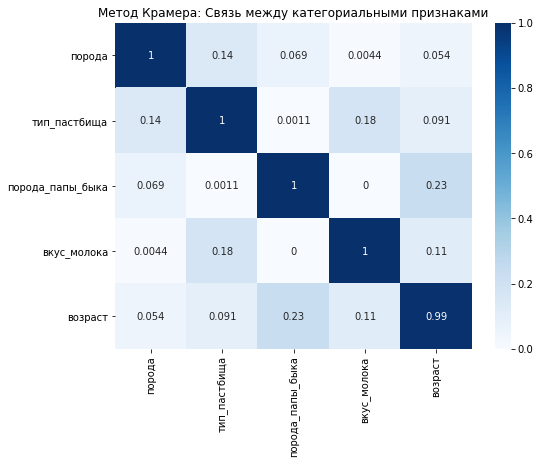

In [30]:
categorical_cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']


def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()  
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) if min(r, k) > 1 else 0

cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)


for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(df_ferma[col1], df_ferma[col2])

cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Метод Крамера: Связь между категориальными признаками')
plt.show()

Пустота... В данном случае есть второй целевой признак - "вкус молока", но у него, можно сказать, нет никаких зависимостей. Можем сказать, что у на вкус точно никак не влияет порода папы быка.

Методом Фи коэфициента попробоем оценить взяимосвязь и категориальных и количественных признаков.

interval columns not set, guessing: ['удой_кг', 'эке', 'протеин_грамм', 'спо', 'жирность_проценты', 'белок_проценты', 'вкус_молока', 'возраст']


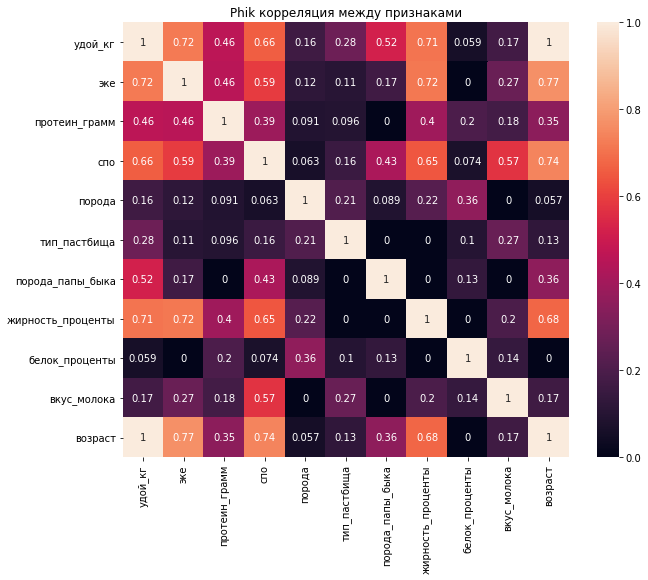

In [31]:
phik_matrix = df_ferma.loc[ : , df_ferma.columns != 'id'].phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, vmin=0, vmax=1)
plt.title('Phik корреляция между признаками')
plt.show()

По целевым признакам картина следующая:
* Удой коррелирует с ЭКЕ,СПО, возрастом и жирностью. Отсутствует зависимость с белком
* Вкус молока коррелирует с СПО и совсем не связан с породой и породой папы быка.

---

### 4.2 Распредления

Пора посмотреть распредления

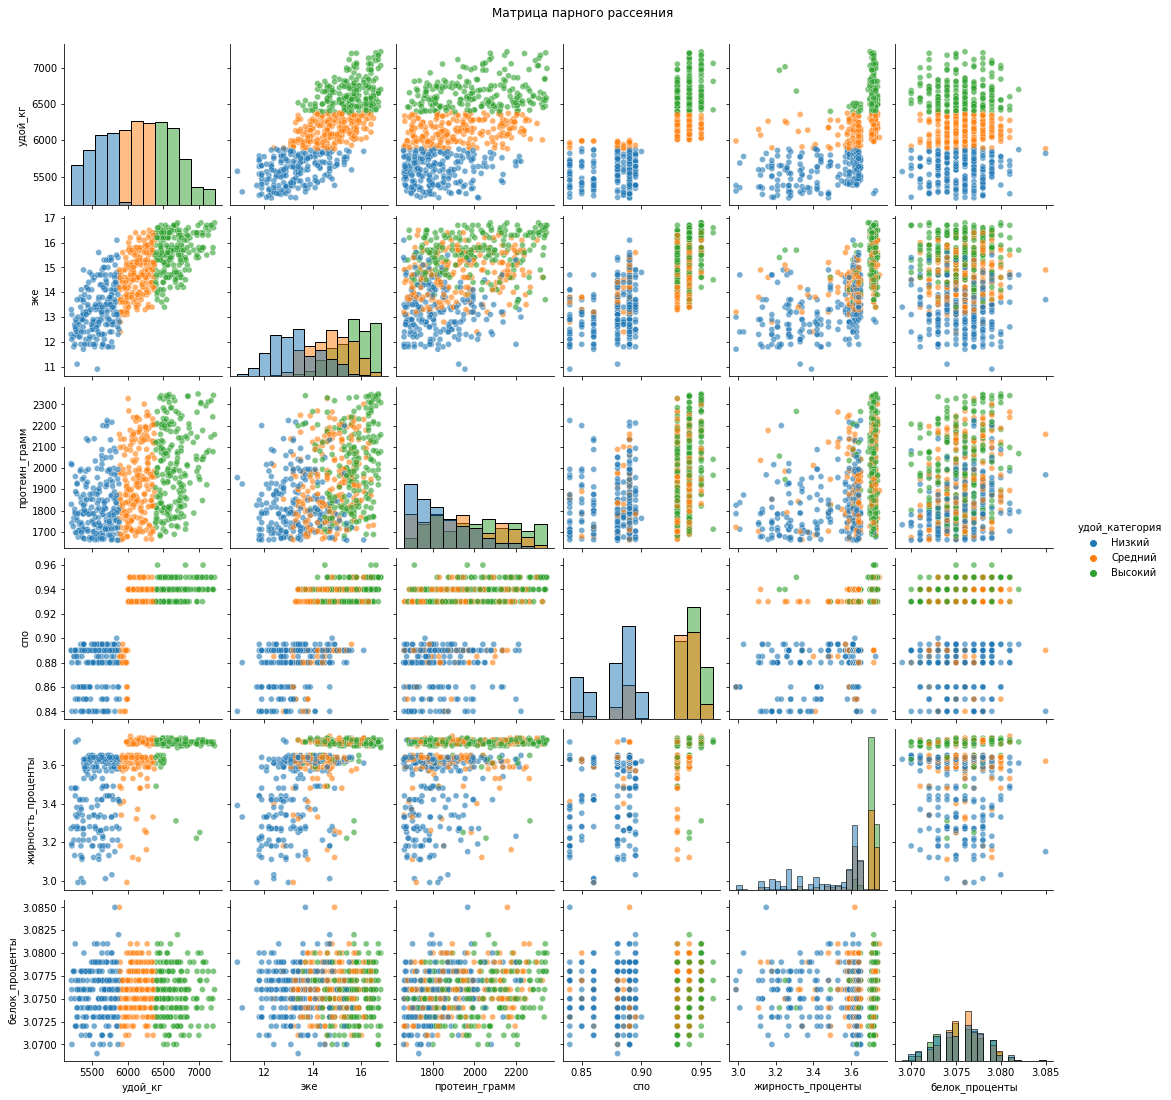

In [32]:
columns = ['удой_кг', 'эке', 'протеин_грамм', 'спо', 'жирность_проценты', 'белок_проценты']
df = df_ferma[columns].copy()
df['удой_категория'] = pd.qcut(df['удой_кг'], q=3, labels=['Низкий', 'Средний', 'Высокий'])

sns.pairplot(df, hue='удой_категория', diag_kind='hist', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Матрица парного рассеяния', y=1.02)
plt.show()

Как и было сказано ранее - очевидна зависимость между удоем, эке и спо. Зависимость прямая, при увеличении входных признаков, увеличивается показатель удоя. Явно видно, что с белком и протеином нет никак зависимости - значения распредлены равномерно по всему объему. 

У удоя и СПО очень странная зависимость, явно не линейная, данное обстоятельство может повлиять на 

<span class="birk"><b>Вывод по разделу "Корреляционный анализ":</b></span>

Количественные признаки демонстрируют тесную взаимосвязь между собой. Особенно ярко выражена высокая корреляция удоя с ЭКЕ, СПО и жирностью. При этом наблюдается прямая зависимость: увеличение значений входных признаков приводит к росту удоя.
Качественные признаки показывают менее выраженные связи. Примечательно, что вкус молока имеет корреляцию только с СПО, в то время как другие не оказывают на него особого влияния.
Отсутствие зависимостей наблюдается между удоем и содержанием белка в молоке, что может указывать на независимое формирование этих показателей. 
Наиболее значимыми факторами, влияющими на продуктивность, являются ЭКЕ, СПО, жирность и возраст. При этом качественные характеристики молока (вкус) в большей степени определяются технологическими параметрами (СПО), чем генетическими факторами.

## 5. Обучение модели линейной регрессии

### 5.1 Первая модель линейной регресии

Нам известно, что признаки в датасете ferma_main.csv можно разделить на группы.
* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Целевой признак, который будем выделять в линейной регресии - удой_кг имеет наибольшую зависимость от ЭКЕ, СПО жирность возраст. 
Для удоя нам надо рассмотреть признаки, который влияют на него - спо, эке, порода папы быка, жирность, возраст. Но не все так просто. Если посмотреть внимательно, то между этими признаками есть высокая мультиколлинеарность. 

Оставим признаки: <b> эке, спо, порода, тип_пастбища </b>.
Потому что
эке (0.720719) и спо (0.661359) имеют сильную связь с удой_кг и представляют характеристики корма, которые биологически важны.
порода и тип_пастбища добавляют генетическую и экологическую информацию, но имеют слабую корреляцию с удой_кг (0.164744 и 0.279540). Их включение оправдано, если они улучшают модель.

Исключены:
возраст (0.998101 с удой_кг, но 0.771596 с эке, 0.744410 с спо): Высокая корреляция с другими признаками делает его избыточным.
жирность_проценты (0.707654 с удой_кг, но 0.715914 с эке): Исключён из-за мультиколлинеарности с эке.
порода_папы_быка (0.519915 с удой_кг): Исключён, так как может дублировать информацию порода (корреляция 0.089330, но стоит проверить).
протеин_грамм (0.463224): Слабая связь
белок_проценты (0.058970): Очень слабая связь.
вкус_молока (0.173122): Слабая связь.

In [33]:
RANDOM_STATE = 42
col = ['эке','спо','порода','тип_пастбища']
col_str = ['порода','тип_пастбища']
col_num = ['эке','спо']
y = df_ferma.удой_кг
X = df_ferma[col]

X_train, X_test, y_train, y_test_1 = train_test_split(
    X, y,test_size=0.2, random_state=RANDOM_STATE)

#добавим скалер и энкодер
scaler_1 = StandardScaler()
encoder_1 = OneHotEncoder(drop='first', sparse=False)
#скалируем количественные признаки
X_train_scaled = scaler_1.fit_transform(X_train[col_num])
X_test_scaled = scaler_1.transform(X_test[col_num])
#кодируем качественные признаки
X_train_ohe = encoder_1.fit_transform(X_train[col_str])
X_test_ohe = encoder_1.transform(X_test[col_str])
encoder_col_names = encoder_1.get_feature_names()
#создадим из масивов фреймы
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_num)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
#объединим в финальные версии
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# выведите пять первых строк из тренировочного датафрейма
X_train.head()

,x0_рефлешнсоверинг,x1_холмистое,эке,спо
0,1.0,0.0,-0.571782,-1.013219
1,0.0,0.0,-1.030792,-0.859273
2,0.0,1.0,0.728747,1.142018
3,0.0,0.0,1.264259,0.526236
4,1.0,0.0,0.575744,0.834127


Данные подготовлены, теперь обучим первую модель и посмотрим ее метрики.

Значение параметра r2 первой модели: 0.708


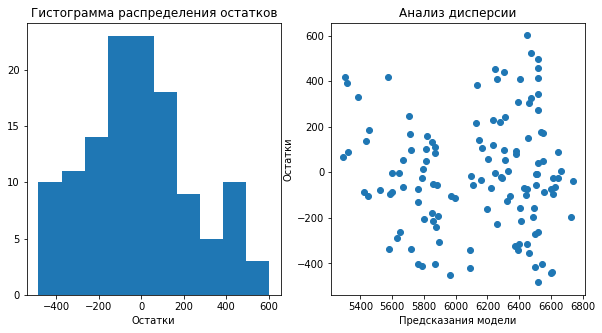

In [34]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
prediction_1 = model_lr_1.predict(X_test)
r_2_1 = r2_score(y_test_1, prediction_1)
print(f'Значение параметра r2 первой модели: {r_2_1:.3f}')

residuals_1 = y_test_1 - prediction_1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_1, x=prediction_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

По полученным данным напрашиваются следующие выводы:
1. показатель r2 достаточно близок к 1 (0,708), что свидетельствует о хорошей точности модели
2. гистограмма распредления остатков также демонстрирует близкий к нормальному график распредления (пик приходится на 0), однако видны провалы около 300 и 500-600, а реже ошибается на эти значния 
3. На первый взгляд анализ дисперсии показывает нормальное распредления, но опять же происходит провал при предсказаниях от 5800 до 6200 с остатками 200 и больше.

Из 2 и 3 пункта можно сделать вывод, что модели не хватает данных, либо не хватает каких-то входных признаков, раз модель ошибется при предсказании значений близких к медианному.

---

### 5.2 Вторая модель линейной регресии

Посмотрев диаграмму рассеивания из раздела 4.1 можно сделать вывод, что СПО и ЭКЕ с удоем связаны не линейно. Это и повлияло на качество модели. Для исправления ситуации СПО преобразуем в категориальный бинарный признак, за границу взяв центральное значение (больше 0.9 - 1, меньше или равно 0). ЭКЕ победим возведя ее в квадрат. Посмотрим на распредление еще раз поближе и внесем изменения в df_ferma.

Text(0.5, 1.0, 'Анализ СПО')

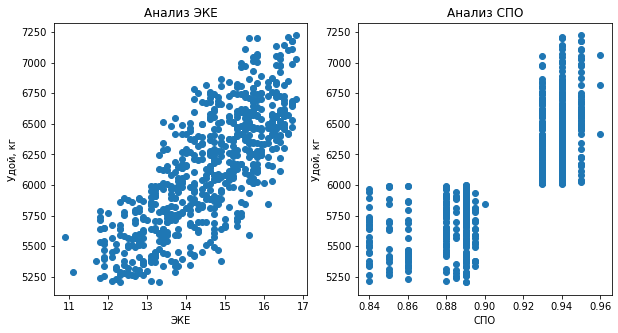

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].scatter(x=df_ferma['эке'], y=df_ferma['удой_кг'])
axes[0].set_ylabel('Удой, кг')
axes[0].set_xlabel('ЭКЕ')
axes[0].set_title('Анализ ЭКЕ')


axes[1].scatter(x=df_ferma['спо'], y=df_ferma['удой_кг'])
axes[1].set_ylabel('Удой, кг')
axes[1].set_xlabel('СПО')
axes[1].set_title('Анализ СПО')


In [36]:
df_ferma['спо_бинарный'] = np.where(df_ferma['спо'] <= 0.9, 'ниже_0.9', 'выше_0.9')
df_ferma['эке_в_квадрате'] = df_ferma['эке'] ** 2
df_ferma.head()

,id,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст,спо_бинарный,эке_в_квадрате
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1,ниже_0.9,201.64
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0,ниже_0.9,163.84
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1,ниже_0.9,196.00
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1,ниже_0.9,153.76
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0,ниже_0.9,163.84


Теперь повторим шаги из первой модели, но с новыми данными.

Полученное значение R2 второй версии модели: 0.751


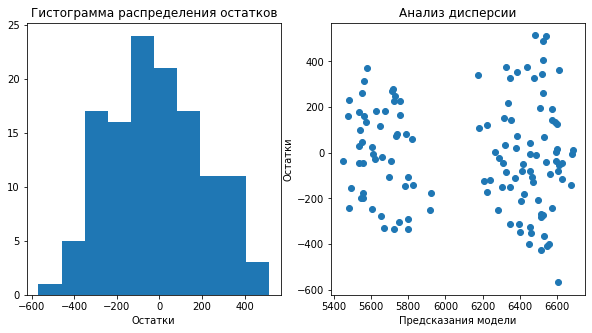

In [37]:
col = ['спо_бинарный', 'эке_в_квадрате','порода','тип_пастбища']
col_num = ['эке_в_квадрате']
col_str = ['спо_бинарный','порода','тип_пастбища']

X = df_ferma[col]
y = df_ferma.удой_кг

X_train, X_test, y_train, y_test_2 = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)
#подготовка данных
encoder_2 = OneHotEncoder(drop='first', sparse=False)
scaler_2 = StandardScaler()
model_lr_2 = LinearRegression()

X_train_ohe = encoder_2.fit_transform(X_train[col_str])
X_test_ohe = encoder_2.transform(X_test[col_str])
encoder_col_names = encoder_2.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = scaler_2.fit_transform(X_train[col_num])
X_test_scaled = scaler_2.transform(X_test[col_num])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
prediction_2 = model_lr_2.predict(X_test)
r_2_2 = r2_score(y_test_2, prediction_2)
print(f'Полученное значение R2 второй версии модели: {r_2_2:.3f}')
residuals_2 = y_test_2 - prediction_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_2, x=prediction_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Показатель R2 стал немного лучше. Тоже самое я бы сказал и про гистограмму - распредление выглядит еще более нормальным, однако дисперсия стала только хуже, виден явный провал во центру. Перейдем к третьей версии.

---

### 5.3 Третья модель линейной регресии

Добавим новый призак имя_папы и посомтрим, что получится

In [38]:
display(df_dad.head())
df_ferma.head()

,id,имя_папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


,id,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст,спо_бинарный,эке_в_квадрате
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1,ниже_0.9,201.64
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0,ниже_0.9,163.84
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1,ниже_0.9,196.00
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1,ниже_0.9,153.76
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0,ниже_0.9,163.84


Добавлять столбец будет по id.

In [39]:
df_ferma_dad = pd.merge(df_ferma, df_dad, on="id")
df_ferma_dad['имя_папы'].isna().sum()

0

Проверили, идем дальше

Полученное значение R2 тертьей версии модели: 0.794


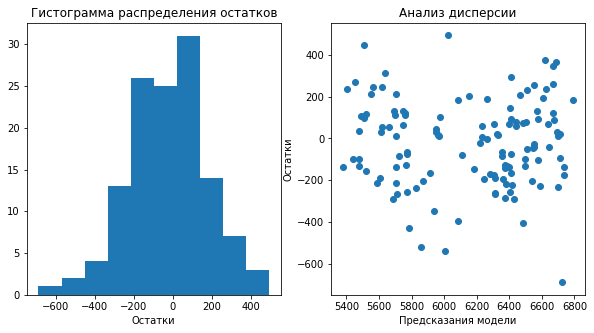

In [40]:
col = ['спо_бинарный', 'эке_в_квадрате','порода','тип_пастбища', 'имя_папы']
col_num = ['эке_в_квадрате']
col_str = ['спо_бинарный','порода','тип_пастбища','имя_папы']

X = df_ferma_dad[col]
y = df_ferma_dad.удой_кг

X_train, X_test, y_train, y_test_3 = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)
#подготовка данных
encoder_3 = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
scaler_3 = StandardScaler()
model_lr_3 = LinearRegression()

X_train_ohe = encoder_3.fit_transform(X_train[col_str])
X_test_ohe = encoder_3.transform(X_test[col_str])
encoder_col_names = encoder_3.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = scaler_3.fit_transform(X_train[col_num])
X_test_scaled = scaler_3.transform(X_test[col_num])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучение модели
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
prediction_3 = model_lr_3.predict(X_test)
r_2_3 = r2_score(y_test_3, prediction_3)
print(f'Полученное значение R2 тертьей версии модели: {r_2_3:.3f}')

residuals_3 = y_test_3 - prediction_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y=residuals_3, x=prediction_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

R2 еще вырос. Распредление практически такое же. Дисперсия стала получше.

---

### 5.4 Три модели линейной регресии вместе

Соберем все три модели вместе и сравним.

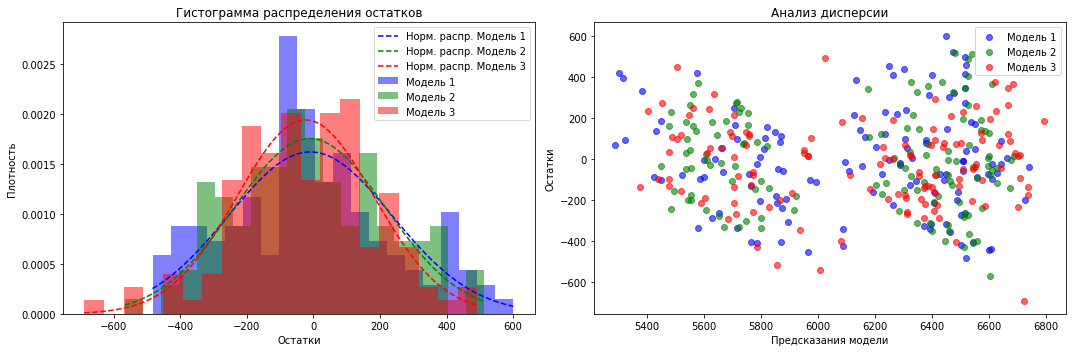

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
colors = ['blue', 'green', 'red']
labels = ['Модель 1', 'Модель 2', 'Модель 3']
for i, residuals in enumerate([residuals_1, residuals_2, residuals_3]):
    axes[0].hist(residuals, bins=20, alpha=0.5, color=colors[i], label=labels[i], density=True)
    mu, sigma = np.mean(residuals), np.std(residuals)
    x = np.linspace(min(residuals), max(residuals), 100)
    axes[0].plot(x, norm.pdf(x, mu, sigma), color=colors[i], linestyle='--', 
                 label=f'Норм. распр. {labels[i]}')

axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Плотность')
axes[0].legend()

for i, (residuals, prediction) in enumerate(zip([residuals_1, residuals_2, residuals_3], 
                                                [prediction_1, prediction_2, prediction_3])):
    axes[1].scatter(x=prediction, y=residuals, alpha=0.6, color=colors[i], label=labels[i])

axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].legend()

plt.tight_layout()
plt.show()

In [42]:
models = [
    {'name': 'Первая модель', 'y_test': y_test_1, 'prediction': prediction_1},
    {'name': 'Вторая модель', 'y_test': y_test_2, 'prediction': prediction_2},
    {'name': 'Третья модель', 'y_test': y_test_3, 'prediction': prediction_3}
]

metrics = []
for model in models:
    y_true, y_pred = model['y_test'], model['prediction']
    metrics.append({
        'Model_ML': model['name'],
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    })

result = pd.DataFrame(metrics)
result.round(2)

,Model_ML,MAE,MSE,RMSE,R2
0,Первая модель,195.92,60593.31,246.16,0.71
1,Вторая модель,185.68,51768.13,227.53,0.75
2,Третья модель,165.89,42743.17,206.74,0.79


На мой взгляд <b>третья модель</b> показала себя лучше всего. Ее показатель R2 наиболее высокое, распредление, как и у всех похоже на нормальное, зато дисперсия наиболее равномерна распредлена по всему объему.

Анализ результатов
1. Сравнение моделей по метрикам
* MAE:

Третья модель имеет наименьшую MAE (165.89 кг), что означает, что её предсказания в среднем отклоняются от истинных значений меньше, чем у других моделей.
Вторая модель (185.68 кг) лучше первой (195.92 кг), но уступает третьей.
Вывод: Третья модель даёт наиболее точные предсказания в среднем.

* MSE:

Третья модель имеет наименьшую MSE (42743.17 кг²), что указывает на меньшую суммарную квадратичную ошибку.
Вторая модель (51768.13 кг²) лучше первой (60593.31 кг²).
Вывод: Третья модель лучше минимизирует большие ошибки, так как MSE чувствительна к выбросам.

* RMSE:

Третья модель имеет наименьшую RMSE (206.74 кг), что подтверждает её превосходство в интерпретируемых единицах (кг).
Вторая модель (227.53 кг) лучше первой (246.16 кг).
Вывод: Третья модель имеет наименьшие средние отклонения, что делает её предпочтительной для практического использования.

* R2:

Третья модель имеет наивысший R² (0.79), что означает, что она объясняет 79% дисперсии удой_кг.
Вторая модель (0.75) и первая (0.71) объясняют меньшую долю дисперсии.
Вывод: Третья модель лучше всего описывает вариацию целевой переменной

--- 

In [43]:
np.percentile(prediction_3, [25,75])

array([5749.83931635, 6496.16899555])

Доверительный интервал прогноза лучшей модели (модели №3) - от 5749,84 до 6496,17кг молока удоя. Для этого рассчитали квантили ошибки модели на тренировочных данных.

---

### 5.5 Прогноз удоя у предлагаемых коров

С помощью модели №3 спрогнозируем удой коров, которых фермер хочет купить. 

Данные о них находятся в df_buy.
Для этого в df_buy добавим недостающие признаки 
* ЭКЕ (Энергетическая кормовая единица)
* Сырой протеин, г 
* СПО (Сахаро-протеиновое соотношение)

Для этого возьмем из df_ferma средние значения каждого из признаков и увеличим их на 5%.


In [44]:
df_buy['эке_в_квадрате'] = (df_ferma['эке'].mean()*1.05) ** 2
df_buy['протеин_грамм'] = df_ferma['протеин_грамм'].mean()*1.05
df_buy['спо_бинарный'] = np.where( (df_ferma['спо'].mean()*1.05) <= 0.9, "ниже_0.9", "выше_0.9")
df_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст,эке_в_квадрате,протеин_грамм,спо_бинарный
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,233.361138,2019.947532,выше_0.9
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,233.361138,2019.947532,выше_0.9
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,233.361138,2019.947532,выше_0.9


In [45]:
col = ['спо_бинарный', 'эке_в_квадрате','порода','тип_пастбища', 'имя_папы']
col_num = ['эке_в_квадрате']
col_str = ['спо_бинарный','порода','тип_пастбища','имя_папы']

df_buy_scaler = scaler_3.transform(df_buy[col_num])
df_buy_ohe = encoder_3.transform(df_buy[col_str])
encoder_col_names = encoder_3.get_feature_names()

df_buy_scaler = pd.DataFrame(df_buy_scaler, columns=col_num)
df_buy_ohe = pd.DataFrame(df_buy_ohe, columns=encoder_col_names)

df_buy_predict = pd.concat([df_buy_ohe, df_buy_scaler], axis=1)
prediction_final = model_lr_3.predict(df_buy_predict)
pred = pd.DataFrame({'прогноз_удоя_кг':prediction_final})
df_buy = pd.concat([df_buy, pred], axis=1)
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст,эке_в_квадрате,протеин_грамм,спо_бинарный,прогноз_удоя_кг
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9,6600.501962
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,233.361138,2019.947532,выше_0.9,6508.243827
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9,6253.216298
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,233.361138,2019.947532,выше_0.9,6600.347165
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,233.361138,2019.947532,выше_0.9,6534.443697
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,0,233.361138,2019.947532,выше_0.9,6560.798364
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9,6600.501962
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,1,233.361138,2019.947532,выше_0.9,6508.243827
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9,6253.216298
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,0,233.361138,2019.947532,выше_0.9,6600.347165


 Вот мы получили предсказания по удою для каждой из предложанных буренок. 

In [46]:
df_buy['прогноз_удоя_кг'].describe()

count      20.000000
mean     6480.752599
std       134.224624
min      6253.216298
25%      6341.960924
50%      6534.443697
75%      6600.347165
max      6600.501962
Name: прогноз_удоя_кг, dtype: float64

Медианное значения среди предложений - 6534 кг. Максимальное - 6600 (причем встречается несколько раз, я бы рекомендовал покупать именно этих коров).

<span class="birk"><b>Вывод по разделу "Обучение линейное регресии":</b></span>

Спроектировали модель линейной регрессии для предсказания удоя коров. Первая и вторая версия имели ряд недостатков. Третья версия получилась наиболее работоспособной. Благодаря ей удалось спрогнозировать удой коров из предложенного списка. Наиболее интересными будут коровы с удоем 6600кг (если рассматривать только - чем больше, тем лучше).

## 6. Обучение модели логистической регрессии

### 6.1 Обучение модели

Посмотрим еще раз, как признаки коррелируют с целевым Вкус_молока

In [47]:
phik_matrix

,удой_кг,эке,протеин_грамм,спо,порода,тип_пастбища,порода_папы_быка,жирность_проценты,белок_проценты,вкус_молока,возраст
удой_кг,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
эке,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
протеин_грамм,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
спо,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
тип_пастбища,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода_папы_быка,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
жирность_проценты,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
белок_проценты,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000
вкус_молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.198793,0.143857,1.000000,0.165974


Целевой - вкус_молока

Входные - эке (уже подготовленые в квадрате), спо (бинарные), тип_пастбища, жирность_проценты

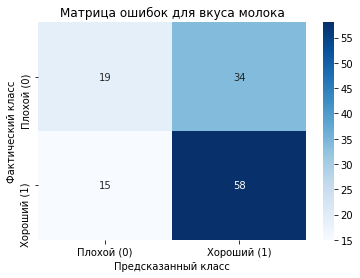

Accuracy: 0.611
Recall: 0.795
Precision: 0.630


In [48]:
col = ['спо_бинарный', 'эке_в_квадрате', 'жирность_проценты', 'тип_пастбища']
col_num = ['эке_в_квадрате', 'жирность_проценты']
col_str = ['спо_бинарный', 'тип_пастбища']

X = df_ferma[col]
y = df_ferma.вкус_молока

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)

clf = LogisticRegression(solver='saga')
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[col_num])
X_test_scaled = scaler.transform(X_test[col_num])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_num)

X_train_ohe = encoder.fit_transform(X_train[col_str])
X_test_ohe = encoder.transform(X_test[col_str])
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Плохой (0)', 'Хороший (1)'], 
            yticklabels=['Плохой (0)', 'Хороший (1)'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.title('Матрица ошибок для вкуса молока')
plt.show()

print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')


Из матрицы ошибок делаем следующие выводы:
1. Модель 19 раз верно определила, что молоко не вкусное
2. 34 раза определила молоко вкусным, когда на самом деле оно не вкусное
3. 15 раз определила не вкусным молоко, которое вкусное
4. 58 раз верно определила вкусное молоко, как вкусное.

Для фермера менее удовлетворительная ситуация допустить ошибку первого рода. В данном случае, лучше хорошое молоко, признать плохим, чем плохое хорошим. Значит, нам необходимо минимизировать ложноположительные результаты. Для этого необходимо увеличить precision до такого згачения, чтобы ложноположительные стали нулем.

In [49]:
y_proba = clf.predict_proba(X_test)[:,1]
thresholds = np.linspace(0.1, 1.0, num=12, endpoint=True)
precision_values = []
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    precision_values.append((threshold, precision))
precision_df = pd.DataFrame(precision_values, columns=['Порог', 'Precision'])
precision_df

,Порог,Precision
0,0.100000,0.579365
1,0.181818,0.579365
2,0.263636,0.579365
3,0.345455,0.590164
4,0.427273,0.620370
5,0.509091,0.633333
6,0.590909,0.714286
7,0.672727,0.840909
8,0.754545,0.846154
9,0.836364,1.000000


Рассмотрим поближе от 0,75 до 0.9

In [50]:
thresholds = np.linspace(0.75, 0.9, num=15, endpoint=True)
precision_values = []
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    precision_values.append((threshold, precision))
precision_df = pd.DataFrame(precision_values, columns=['Порог', 'Precision'])
precision_df

,Порог,Precision
0,0.750000,0.846154
1,0.760714,0.833333
2,0.771429,0.909091
3,0.782143,0.909091
4,0.792857,0.875000
5,0.803571,1.000000
6,0.814286,1.000000
7,0.825000,1.000000
8,0.835714,1.000000
9,0.846429,0.000000


In [51]:
y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.8)
confusion_matrix(y_test, y_pred)

array([[53,  0],
       [67,  6]])

Нашли пороговое значение, при котором ошибка первого рода (признать не вкусное молоко вкусным, сводится к минимуму)

---

### 6.2 Предсказание вкуса молока

In [52]:
df_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст,эке_в_квадрате,протеин_грамм,спо_бинарный,прогноз_удоя_кг
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9,6600.501962
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,233.361138,2019.947532,выше_0.9,6508.243827
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9,6253.216298
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,233.361138,2019.947532,выше_0.9,6600.347165
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,233.361138,2019.947532,выше_0.9,6534.443697


In [53]:
col = ['спо_бинарный', 'эке_в_квадрате', 'жирность_проценты', 'тип_пастбища']
col_num = ['эке_в_квадрате', 'жирность_проценты']
col_str = ['спо_бинарный', 'тип_пастбища']

df_buy_scaler = scaler.transform(df_buy[col_num])
df_buy_ohe = encoder.transform(df_buy[col_str])
df_buy_scaler = pd.DataFrame(df_buy_scaler, columns=col_num)
df_buy_ohe = pd.DataFrame(df_buy_ohe, columns=encoder.get_feature_names())


df_buy_predict = pd.concat([df_buy_ohe, df_buy_scaler], axis=1)
prediction_final = (clf.predict_proba(df_buy_predict)[:, 1] >= 0.8)
pred = pd.DataFrame({'прогноз_вкуса_молока':prediction_final})
df_buy = pd.concat([df_buy, pred], axis=1)
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_проценты,белок_проценты,возраст,эке_в_квадрате,протеин_грамм,спо_бинарный,прогноз_удоя_кг,прогноз_вкуса_молока
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9,6600.501962,False
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,233.361138,2019.947532,выше_0.9,6508.243827,False
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9,6253.216298,False
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,233.361138,2019.947532,выше_0.9,6600.347165,False
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,233.361138,2019.947532,выше_0.9,6534.443697,False
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,0,233.361138,2019.947532,выше_0.9,6560.798364,False
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,233.361138,2019.947532,выше_0.9,6600.501962,False
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,1,233.361138,2019.947532,выше_0.9,6508.243827,False
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,233.361138,2019.947532,выше_0.9,6253.216298,False
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,0,233.361138,2019.947532,выше_0.9,6600.347165,False


In [54]:
len(df_buy.query(('прогноз_вкуса_молока==True')))

0

Не нашлось ни одной коровы с высокой вероятностью вкусного молока (с минимальной вероятностью ложноположительного варианта).

<span class="birk"><b>Вывод по разделу "Обучение логической регресии":</b></span>

Удалось обучить модель логической регресии. К сожалению, нет ни одной коровы, где можно быть увереным, минимум на 80%, что молоко будет вкусным. Если фермеру точно нужна буренка, то необходимо добавить вероятность риска на вкус. 

## Итоговые выводы

**Итоговые выводы по работе**

В ходе работы проведен комплексный анализ данных о поголовье коров, их характеристиках и предлагаемых к покупке животных. На этапе предобработки данных были устранены ошибки (дубликаты, некорректные записи, выбросы), приведены к единому формату названия столбцов и исправлены типы данных. Это позволило подготовить чистый и структурированный датасет для дальнейшего анализа.

Исследовательский анализ выявил ключевые закономерности в данных. Основной целевой показатель — удой — имеет явную зависимость от энергетической кормовой единицы (ЭКЕ), сахаро-протеинового соотношения (СПО), жирности и возраста коров. Вкус молока, второй целевой признак, оказался связан только с СПО, что указывает на ограниченное влияние генетических факторов (порода, порода отца) на этот параметр. Также установлено, что в текущем поголовье преобладают коровы старше 2 лет, чаще встречается порода Вис Бик Айдиал, а наиболее популярное пастбище — холмистое. Среди предлагаемых к покупке коров больше половины относятся к породе РефлешнСоверинг и предпочитают равнинные пастбища.

Корреляционный анализ подтвердил сильную взаимосвязь количественных признаков (удой, ЭКЕ, СПО, жирность), в то время как качественные признаки (порода, тип пастбища) показали слабую корреляцию с целевыми показателями. Это позволило выбрать наиболее релевантные признаки для построения моделей.

Для предсказания удоя была разработана модель линейной регрессии, из которой третья версия показала наилучшие результаты (R² = 0.79, MAE = 165.89 кг, RMSE = 206.74 кг). Модель позволила спрогнозировать удой для коров из df_buy, где медианное значение составило 6534 кг, а максимальное — 6600 кг. Эти коровы рекомендованы к покупке, если приоритет — максимальный удой.

Для предсказания вкуса молока применялась логистическая регрессия. Модель показала умеренную точность, но не выявила коров с высокой вероятностью вкусного молока (≥80%) при минимальной вероятности ложноположительных ошибок. Это говорит о сложности прогнозирования вкуса на основе имеющихся данных.

**Рекомендации**  
1. **По данным**:  
   - Дополнить датасет новыми признаками, которые могут влиять на вкус молока (например, условия содержания, рацион, технологии доения), чтобы повысить точность модели логистической регрессии.  
   - Провести дополнительный анализ нелинейных зависимостей между признаками, особенно для СПО и удоя, чтобы улучшить качество моделей.  
   - Уточнить природу возможных «близнецов-коров» в df_buy, добавив уникальные идентификаторы для исключения дубликатов.  

2. **Для фермера**:  
   - Для увеличения удоя рекомендуется приобретать коров с прогнозируемым удоем 6600 кг, так как они демонстрируют наилучшие показатели продуктивности.  
   - Если вкус молока является приоритетом, стоит рассмотреть возможность принятия риска, так как ни одна корова из предложенных не гарантирует высокого качества молока с порогом ≥80%. Альтернативно, можно запросить дополнительные данные о рационе и условиях содержания коров.  
   - Обратить внимание на кормовую базу (ЭКЕ и СПО), так как эти параметры оказывают наибольшее влияние на удой и вкус молока.  

Работа показала, что текущие данные позволяют достаточно точно прогнозировать удой, но для вкуса молока требуются дополнительные исследования и данные.